<a href="https://colab.research.google.com/github/Poulami0702/LGMVIP-DataScience/blob/main/BEGINNER_LEVEL_TASK_01_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading data

In [65]:
data = pd.read_csv("./IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Information about the data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# data description

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Correlation of the data

In [6]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# visualizing of the classes 

In [7]:
from collections import Counter

c = Counter(data['species'])
print(f"Classes of the data {c.keys()}")
print(f"count of the data {c.values()}")

Classes of the data dict_keys(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
count of the data dict_values([50, 50, 50])


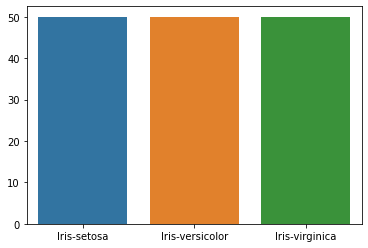

In [8]:
x = list(c.keys())
xval = []
h = list(c.values())

for i in x:
    xval.append(str(i))

sns.barplot(x=xval,y=h,data=data)
plt.show()

Text(0.5, 1.0, 'petalLength vs petalWidth')

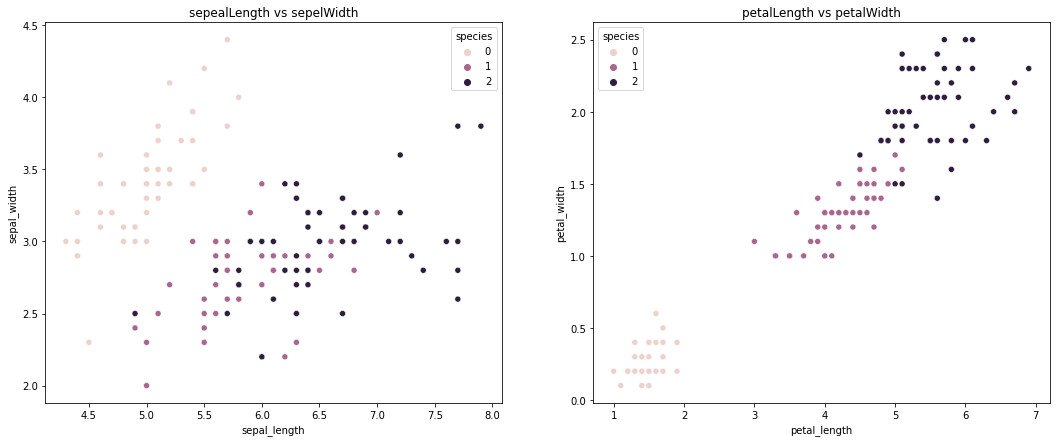

In [53]:
##let's see how two different columns helps us differentiating species
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
sns.scatterplot(ax=axs[0],x = "sepal_length",y ="sepal_width",hue='species',data=data)
axs[0].set_title("sepealLength vs sepelWidth")
sns.scatterplot(ax=axs[1],x = "petal_length",y ="petal_width",hue='species',data=data)
axs[1].set_title("petalLength vs petalWidth")

1. From the above visualization, we can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lengths and smaller sepal widths.

2. We see that setosa has the smallest petal length as well as petal widths, while Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width

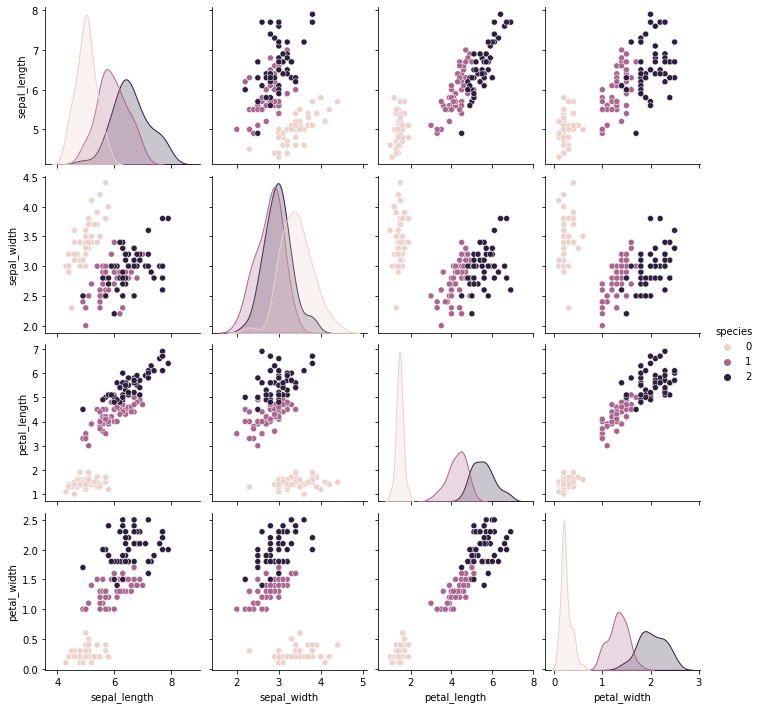

In [54]:
sns.pairplot(data,hue='species');
plt.grid(True)

We can see that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions whether it is sepal or petal. While virginica has high pedal width and length while it has small sepal width but large sepal length.

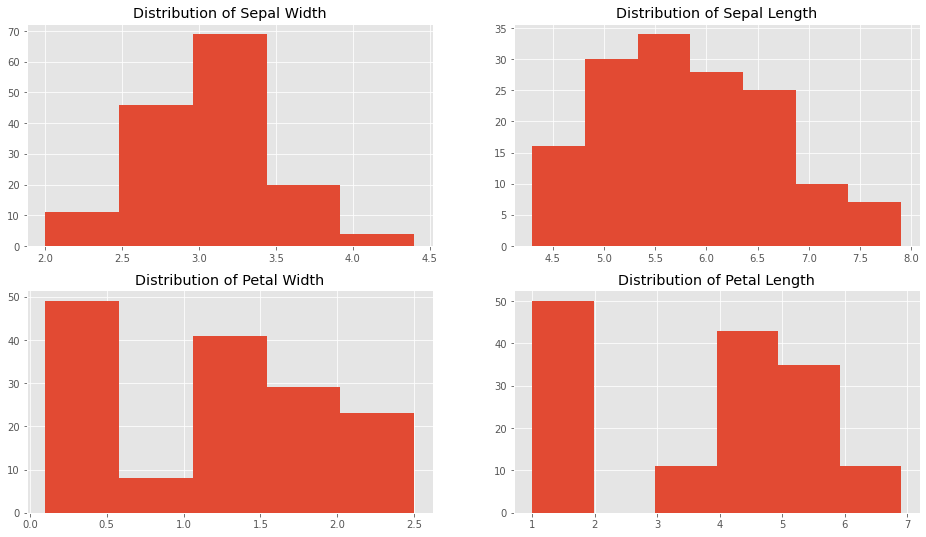

In [56]:
plt.style.use("ggplot")
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(data['sepal_width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(data['sepal_length'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(data['petal_width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(data['petal_length'], bins=6);

* Distribution of Sepel Width is unimodal ,ranging between 4.4 to 7.9 ,with mean of nearly 3 and medial is somewhare between 3.3 to 3.5, maximum data fall between the range of 2.5 to 4

* Distribution of Sepel Length is unimodal ,ranging between 2.0 to 4.4 ,with mean of nearly 5.8 and medial is somewhare around 6, maximum data fall between the range of 5 to 7

* Distribution of petal Width is bimodal ,ranging between 0 to 2.5 ,with mean of nearly 1.2 and medial is somewhare around 1.4, maximum data fall between the range of 0.0 to 0.5 and between 1.0 to 1.5

* Distribution of petal Length is biimodal ,ranging between 1.0 to 6.9 ,with mean of nearly 4 and medial is somewhare between 4, maximum data fall between the range of 1 to 2 and 4 to 6

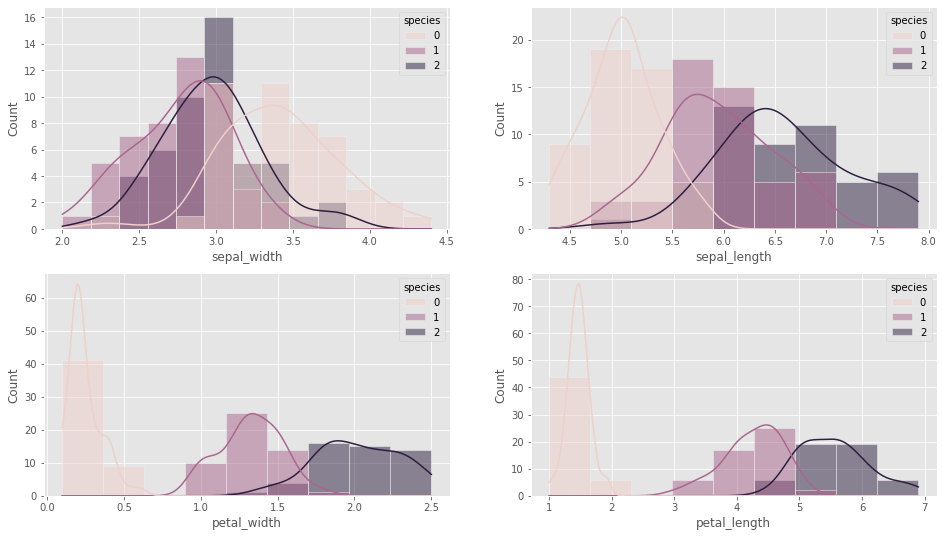

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.histplot(ax = axes[0,0],data=data,x ='sepal_width',hue='species',kde=True)
sns.histplot(ax = axes[0,1],data=data,x ='sepal_length',hue='species',kde=True)
sns.histplot(ax = axes[1,0],data=data,x ='petal_width',hue='species',kde=True)
sns.histplot(ax = axes[1,1],data=data,x ='petal_length',hue='species',kde=True)

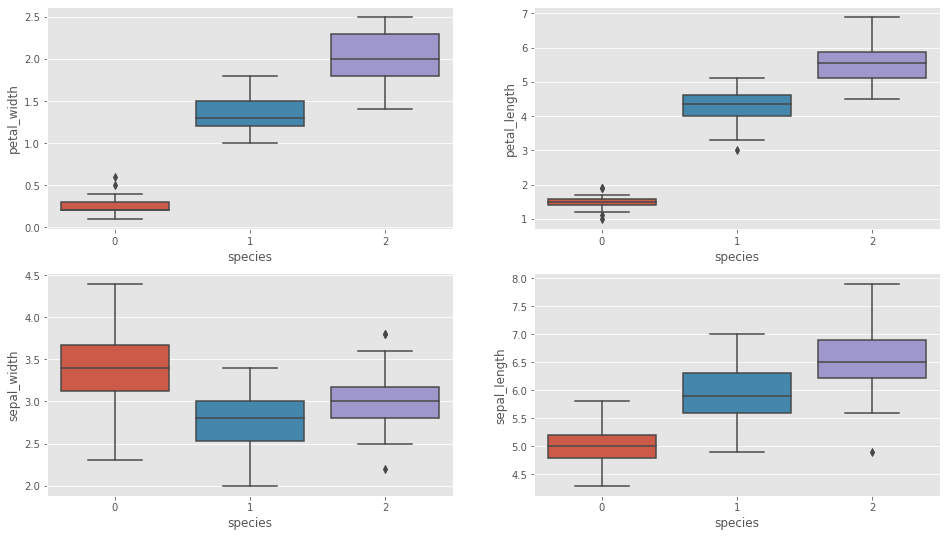

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_width", x= "species", data=data,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=data,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_width", x= "species", data=data,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_length", x= "species", data=data,  orient='v' , ax=axes[1, 1])
plt.show()

### Conclusion of EDA
* The dataset is balanced i.e. equal records are present for all three species.
* We have four numerical columns while just one categorical column which in turn is our target column.
* A strong correlation is present between petal width and petal length.
The setosa species is the most easily distinguishable because of its small feature size.
* The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.
* We do have some outliers and duplicates but we have just 150 recodrs and outliers are not putting a big impact so we are not going to wrangle them.

# LabelEncoding of the class variable

In [9]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data['species'] = lb.fit_transform(data['species'])

# Shuffling the data 

In [10]:
from sklearn.utils import shuffle


data_S = shuffle(data.values)

In [11]:
data_S

array([[6.2, 2.2, 4.5, 1.5, 1. ],
       [7.2, 3.6, 6.1, 2.5, 2. ],
       [6.4, 2.8, 5.6, 2.1, 2. ],
       [6.1, 3. , 4.6, 1.4, 1. ],
       [5.2, 2.7, 3.9, 1.4, 1. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [6.5, 3. , 5.5, 1.8, 2. ],
       [6.7, 3. , 5. , 1.7, 1. ],
       [6.1, 2.6, 5.6, 1.4, 2. ],
       [5.8, 2.7, 3.9, 1.2, 1. ],
       [4.8, 3. , 1.4, 0.3, 0. ],
       [5.7, 2.8, 4.5, 1.3, 1. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [6.7, 3.1, 4.7, 1.5, 1. ],
       [6.5, 3.2, 5.1, 2. , 2. ],
       [5.8, 2.7, 5.1, 1.9, 2. ],
       [5.1, 3.8, 1.9, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [6.9, 3.1, 5.1, 2.3, 2. ],
       [5.8, 2.7, 4.1, 1. , 1. ],
       [5. , 2. , 3.5, 1. , 1. ],
       [4.9, 2.5, 4.5, 1.7, 2. ],
       [5.8, 2.6, 4. , 1.2, 1. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [5.7, 2.6, 3.5, 1. , 1. ],
       [6.3, 2.9, 5.6, 1.8, 2. ],
       [5. , 3.5, 1.3, 0.3, 0. ],
       [5.5, 2.6, 4.4, 1.2, 1. ],
       [6. , 2

# Features and Labels

In [68]:
X = data_S[:, :-1] #features
Y = data_S[:, -1] #labels 

# Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [14]:
X = sc.fit_transform(X)

# SPLITTING THE DATA 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier().fit(X_train, Y_train)

In [17]:
y_pred = dc.predict(X_test)

# Metrics of the data 

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Test Accuracy score of the data {accuracy_score(y_pred, Y_test)}")
print(f"Train Accuracy score of the data {accuracy_score(dc.predict(X_train), Y_train)}")

Test Accuracy score of the data 0.9333333333333333
Train Accuracy score of the data 1.0


In [19]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(dc.predict(X_train), Y_train))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(y_pred, Y_test))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        41
         2.0       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.89      0.89      0.89         9
         2.0       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Test confusion matrix of the data 
 [[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


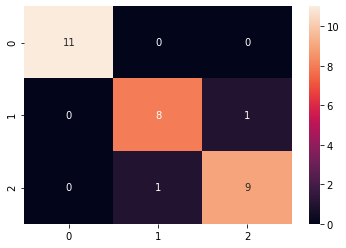

In [20]:
print(f"Test confusion matrix of the data \n {confusion_matrix(y_pred, Y_test)}")
sns.heatmap(confusion_matrix(y_pred, Y_test), annot=True)

Train confusion matrix of the data 
 [[39  0  0]
 [ 0 41  0]
 [ 0  0 40]]


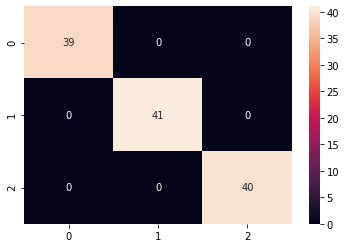

In [21]:
print(f"Train confusion matrix of the data \n {confusion_matrix(dc.predict(X_train), Y_train)}")
sns.heatmap(confusion_matrix(dc.predict(X_train), Y_train), annot=True)

# Neural nets

In [23]:
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Validation data split

In [24]:
# Validation data 

X_train, X_val, Y_train, Y_val= train_test_split(X_train, Y_train, test_size=0.2)

# Categorical data

In [25]:
Y_train = to_categorical(Y_train, num_classes=3)
Y_test = to_categorical(Y_test, num_classes=3)
Y_val = to_categorical(Y_val, num_classes=3)

# Model creation

In [26]:
model = Sequential()

model.add(Dense(1024, input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation="relu"))
model.add(Dense(216, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              5120      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 216)               110808    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               27776     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 9

# Compile

In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model

In [46]:
history = model.fit(X_train, Y_train,
         epochs=3,
         validation_data = (X_val, Y_val))

Epoch 1/3
3/3 [==============================] - 0s 36ms/step - loss: 3.1303e-06 - accuracy: 1.0000 - val_loss: 7.5144e-04 - val_accuracy: 1.0000
Epoch 2/3
3/3 [==============================] - 0s 24ms/step - loss: 2.6547e-06 - accuracy: 1.0000 - val_loss: 6.1560e-04 - val_accuracy: 1.0000
Epoch 3/3
3/3 [==============================] - 0s 21ms/step - loss: 2.5529e-06 - accuracy: 1.0000 - val_loss: 7.2430e-04 - val_accuracy: 1.0000


# Visualizing model errors and accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


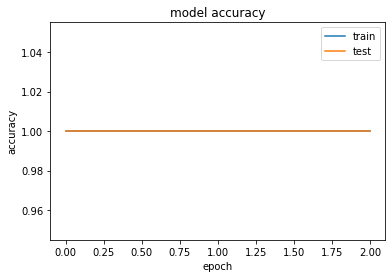

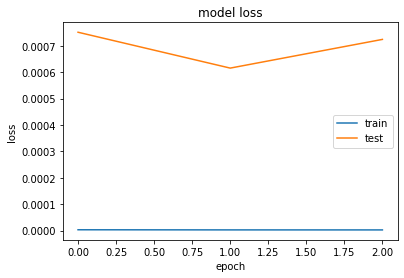

In [47]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


#Evaluating Model
score  = model.predict_classes(X_test)


# Converting into the categorical labels

In [48]:

def cate(Y_test):
    Y_test_ = []
    for i in Y_test:
        Y_test_.append(np.argmax(i))
        
    return Y_test_

Y_train_ = cate(Y_train)
Y_test_ = cate(Y_test)

# Accuracy score of the data 

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Test Accuracy score of the data {accuracy_score(score, Y_test_)}")
print(f"Train Accuracy score of the data {accuracy_score(model.predict_classes(X_train), Y_train_)}")

Test Accuracy score of the data 0.9
Train Accuracy score of the data 1.0


# Classification report 

In [50]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(model.predict_classes(X_train), Y_train_))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(score, Y_test_))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        28

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



# Confusion matrix

Test Accuracy score of the data 
 [[10  0  0]
 [ 1  8  1]
 [ 0  1  9]]


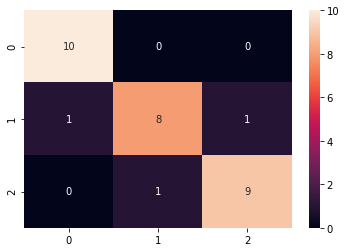

In [51]:
print(f"Test Accuracy score of the data \n {confusion_matrix(score, Y_test_)}")
sns.heatmap(confusion_matrix(score, Y_test_), annot=True)

Train Accuracy score of the data 
 [[34  0  0]
 [ 0 34  0]
 [ 0  0 28]]


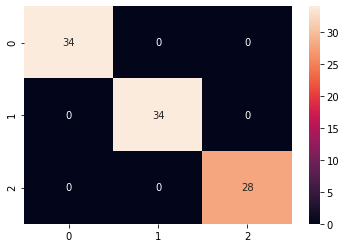

In [52]:
print(f"Train Accuracy score of the data \n {confusion_matrix(model.predict_classes(X_train), Y_train_)}")
sns.heatmap(confusion_matrix(model.predict_classes(X_train), Y_train_), annot=True)

### Tree Representation

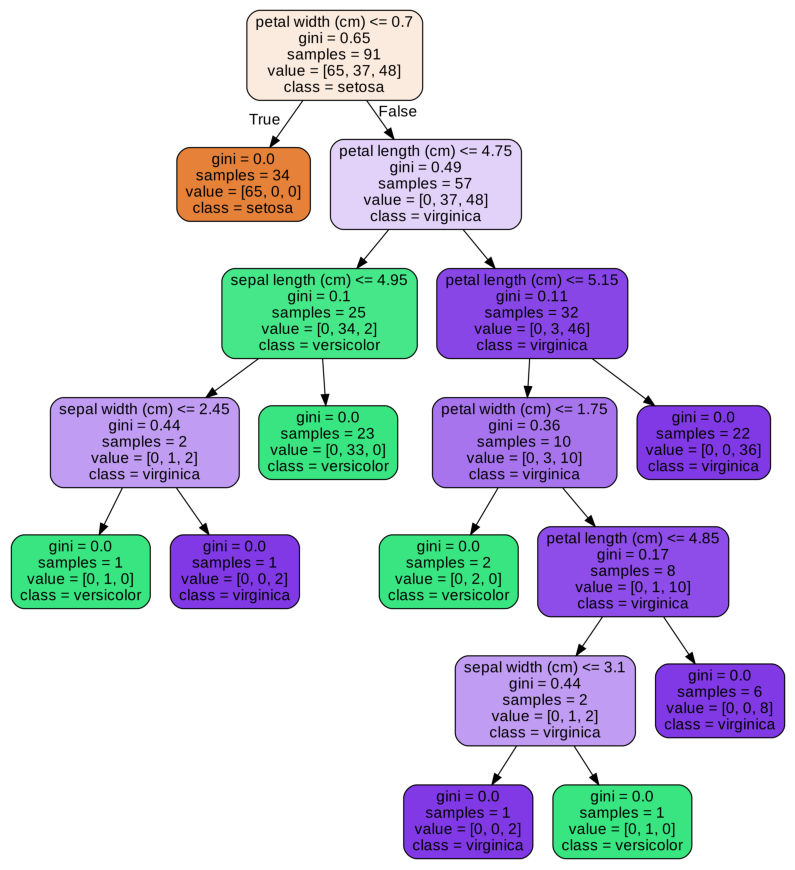

In [69]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();